

Number of Eigenvalues above 1: 5
Variance explained by the first two principal components: 99.98%


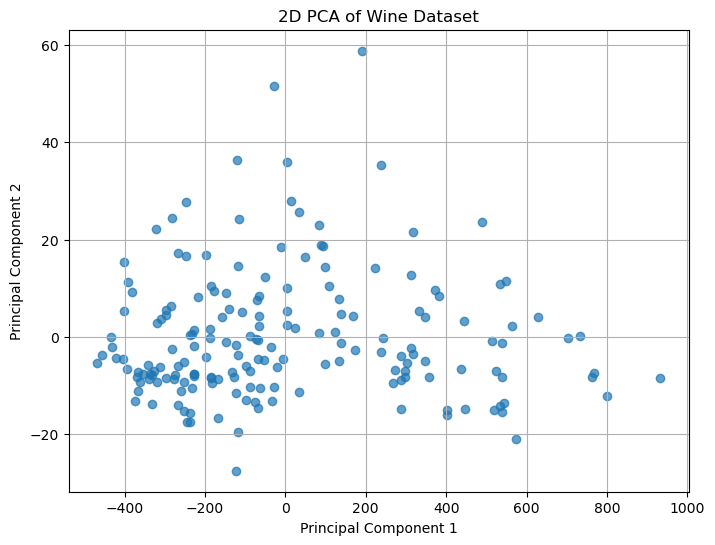

In [3]:
# Question 1

import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


data = pd.read_csv('wines.csv')


pca = PCA(n_components=None)  
X_pca = pca.fit_transform(data)

eigenvalues = pca.explained_variance_
num_eigenvalues_above_one = sum(eigenvalues > 1)

explained_variance = pca.explained_variance_ratio_
variance_two_components = sum(explained_variance[:2]) * 100  


print()
print()
print(f"Number of Eigenvalues above 1: {num_eigenvalues_above_one}")
print(f"Variance explained by the first two principal components: {variance_two_components:.2f}%")


plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of Wine Dataset')
plt.grid(True)
plt.show()



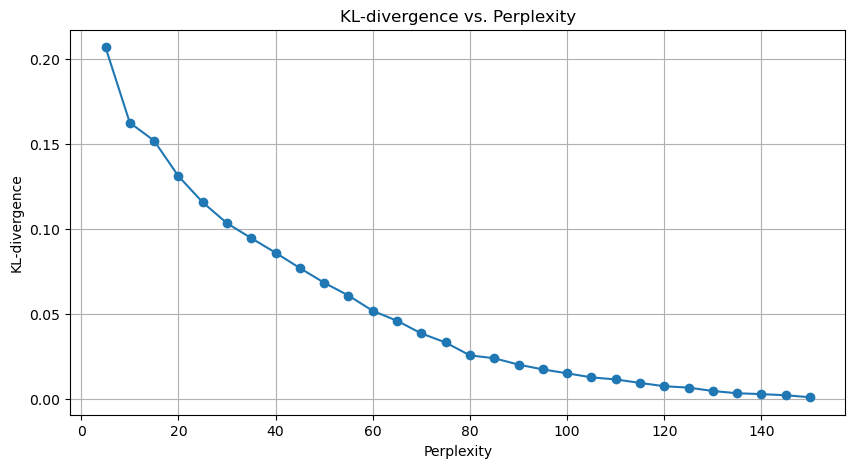

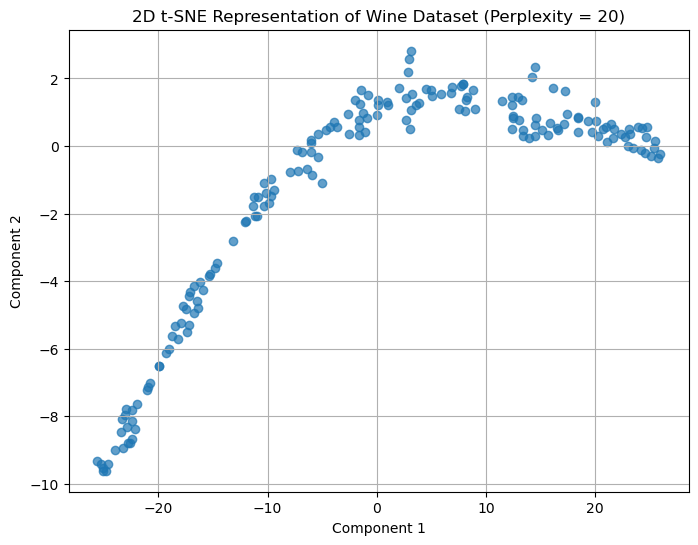

In [4]:
# Question 2

import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


data = pd.read_csv('wines.csv')


perplexities = np.linspace(5, 150, 30).astype(int)
kl_divergences = []
tsne_results = {}

for perplexity in perplexities:
    tsne = TSNE(n_components=2, perplexity=perplexity, learning_rate='auto', init='random')
    Y = tsne.fit_transform(data)
    kl_divergences.append(tsne.kl_divergence_)
    if perplexity == 20:
        tsne_results[20] = Y

# Plot 1
plt.figure(figsize=(10, 5))
plt.plot(perplexities, kl_divergences, marker='o')
plt.title('KL-divergence vs. Perplexity')
plt.xlabel('Perplexity')
plt.ylabel('KL-divergence')
plt.grid(True)
plt.show()

# Plot 2
plt.figure(figsize=(8, 6))
plt.scatter(tsne_results[20][:, 0], tsne_results[20][:, 1], alpha=0.7)
plt.title('2D t-SNE Representation of Wine Dataset (Perplexity = 20)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.show()




Stress of the MDS embedding: 19573.0010


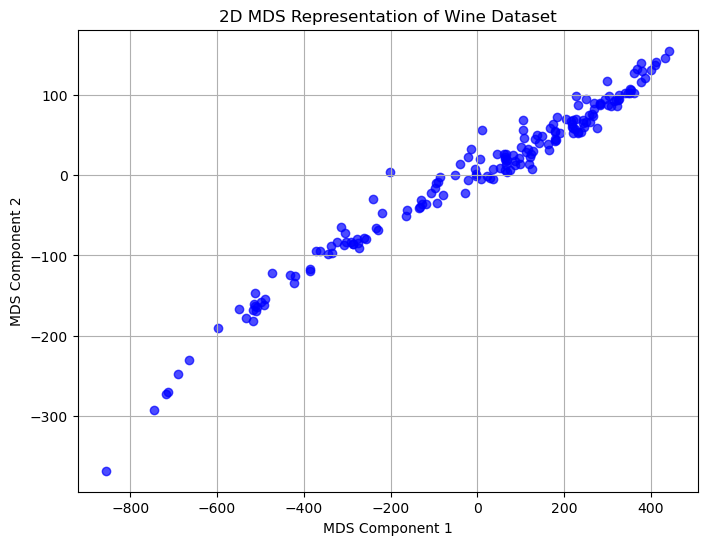

In [9]:
# Question 3

import pandas as pd
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

data = pd.read_csv('wines.csv')

mds = MDS(n_components=2, random_state=42)
mds_transformed = mds.fit_transform(data)

stress_value = mds.stress_

print()
print()
print(f"Stress of the MDS embedding: {stress_value:.4f}")


plt.figure(figsize=(8, 6))
plt.scatter(mds_transformed[:, 0], mds_transformed[:, 1], alpha=0.7, color='blue')
plt.title('2D MDS Representation of Wine Dataset')
plt.xlabel('MDS Component 1')
plt.ylabel('MDS Component 2')
plt.grid(True)
plt.show()






The optimal number of clusters: 2


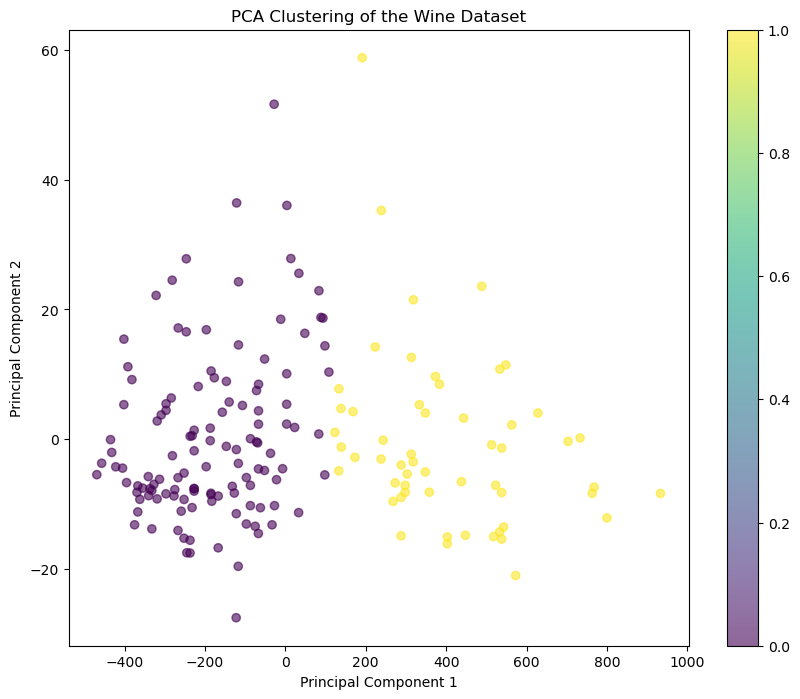

Total sum of squared distances to cluster centers: 4540738.708341659


In [11]:
# Question 4

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np


data = pd.read_csv('wines.csv')

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

range_n_clusters = list(range(2, 11))
silhouette_scores = []
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(data_pca)
    silhouette_avg = silhouette_score(data_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)

optimal_clusters = range_n_clusters[np.argmax(silhouette_scores)]
print()
print()
print(f"The optimal number of clusters: {optimal_clusters}")

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(data_pca)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.title('PCA Clustering of the Wine Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter)
plt.show()

total_sum_of_squares = kmeans.inertia_
print(f"Total sum of squared distances to cluster centers: {total_sum_of_squares}")


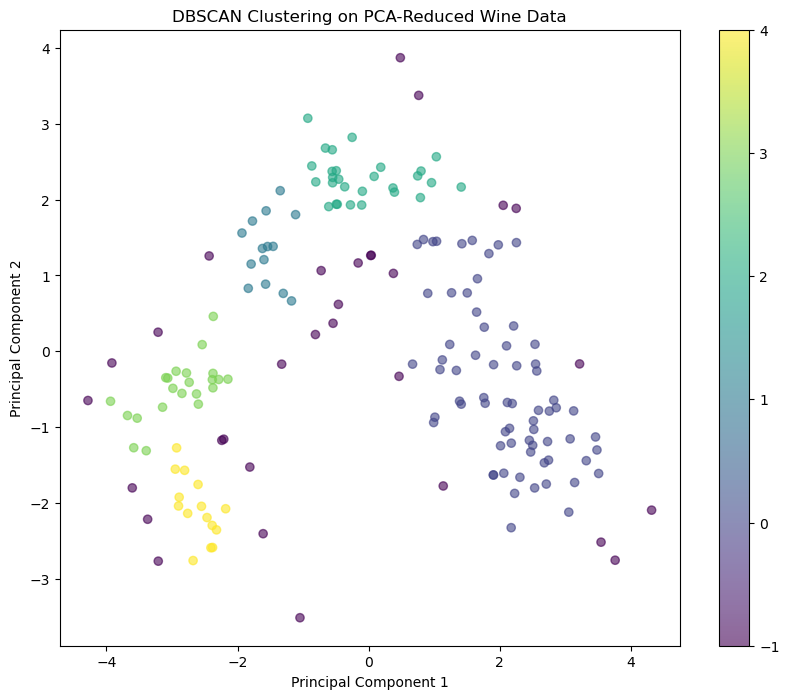

In [12]:
# Question 5

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('wines.csv')

data_scaled = StandardScaler().fit_transform(data)

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

epsilon = 0.5  
minPoints = 5  


dbscan = DBSCAN(eps=epsilon, min_samples=minPoints)
clusters = dbscan.fit_predict(data_pca)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.title('DBSCAN Clustering on PCA-Reduced Wine Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter)
plt.show()


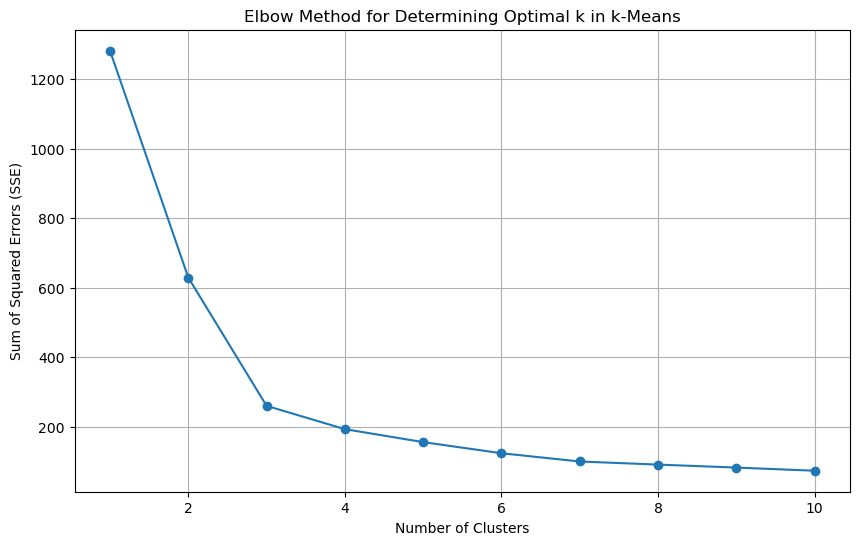

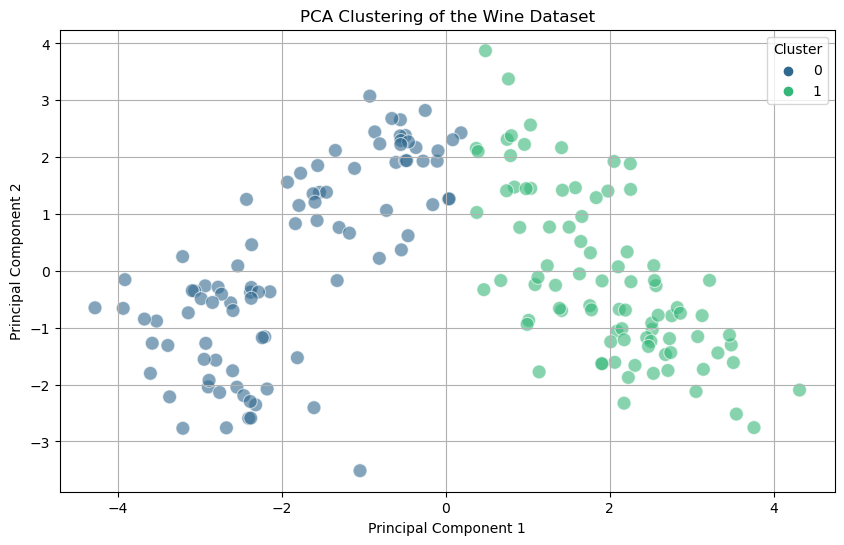

In [14]:
# Extra Credit 1

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('wines.csv')

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)


sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_result)
    sse.append(kmeans.inertia_)

# Plot 1
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Determining Optimal k in k-Means')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.grid(True)
plt.show()

optimal_clusters = 2
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(pca_result)

# Plot 2
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=clusters, palette='viridis', s=100, alpha=0.6)
plt.title('PCA Clustering of the Wine Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


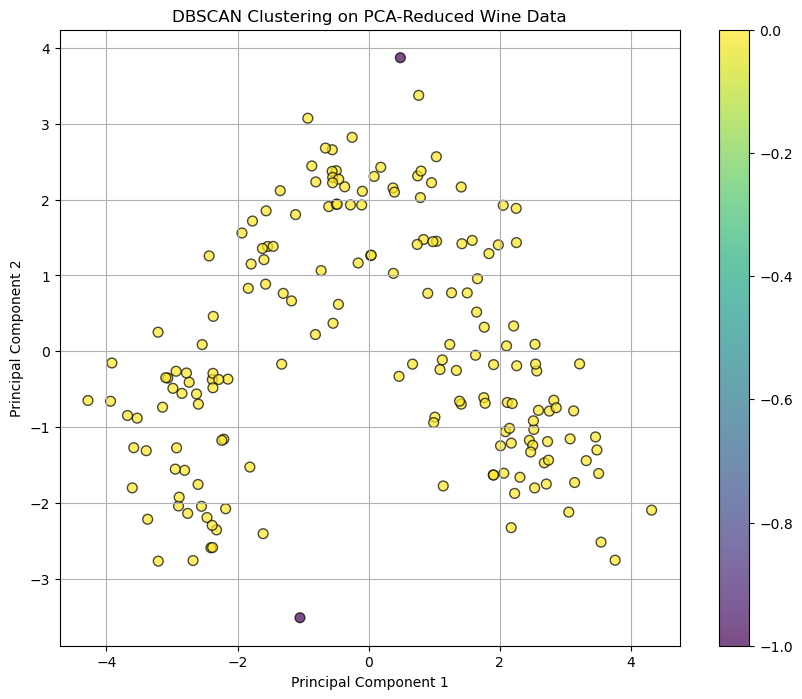

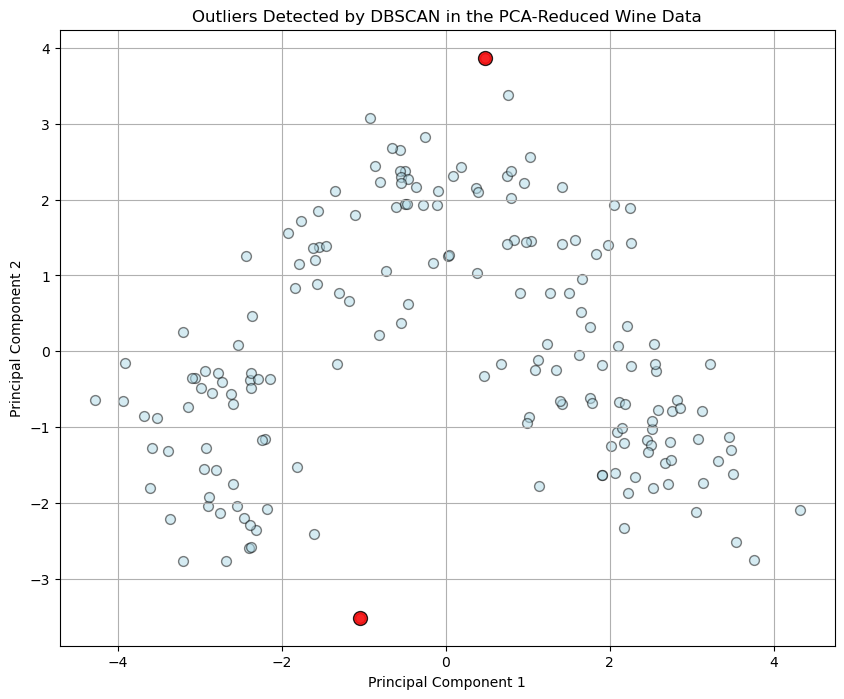

In [15]:
# Extra Credit 2

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('wines.csv')

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
epsilon = 1.0  
min_samples = 5  
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
clusters = dbscan.fit_predict(data_pca)

# Plot 1
plt.figure(figsize=(10, 8))
scatter = plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='viridis', edgecolor='k', s=50, alpha=0.7)
plt.colorbar(scatter)
plt.title('DBSCAN Clustering on PCA-Reduced Wine Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

outlier_indices = [idx for idx, label in enumerate(clusters) if label == -1]
outlier_samples = data_pca[outlier_indices]

# Plot 2
plt.figure(figsize=(10, 8))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c='lightblue', edgecolor='k', s=50, alpha=0.5)  # Normal points
plt.scatter(outlier_samples[:, 0], outlier_samples[:, 1], c='red', edgecolor='k', s=100, alpha=0.85)  # Outliers
plt.title('Outliers Detected by DBSCAN in the PCA-Reduced Wine Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()
